<a href="https://colab.research.google.com/github/Harinibestha/hello-world/blob/master/TextRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'status': 'Running'}
{'status': 'Succeeded', 'recognitionResults': [{'page': 1, 'clockwiseOrientation': 359.41, 'width': 722, 'height': 800, 'unit': 'pixel', 'lines': [{'boundingBox': [140, 71, 213, 68, 214, 82, 141, 85], 'text': 'DO BRITISH', 'words': [{'boundingBox': [142, 72, 161, 71, 162, 83, 142, 85], 'text': 'DO', 'confidence': 'Low'}, {'boundingBox': [167, 70, 212, 70, 213, 82, 167, 83], 'text': 'BRITISH'}]}, {'boundingBox': [140, 78, 216, 76, 217, 91, 141, 93], 'text': 'DO COUNCIL', 'words': [{'boundingBox': [142, 79, 161, 80, 161, 93, 142, 93], 'text': 'DO', 'confidence': 'Low'}, {'boundingBox': [166, 80, 217, 77, 217, 91, 166, 92], 'text': 'COUNCIL'}]}, {'boundingBox': [283, 71, 336, 70, 336, 92, 283, 92], 'text': 'Aidp', 'words': [{'boundingBox': [287, 69, 335, 69, 335, 91, 287, 91], 'text': 'Aidp', 'confidence': 'Low'}]}, {'boundingBox': [419, 64, 572, 58, 573, 69, 420, 75], 'text': 'CAMBRIDGE ENGLISH', 'words': [{'boundingBox': [444, 64, 515, 61, 516, 71, 445, 74], 'text'

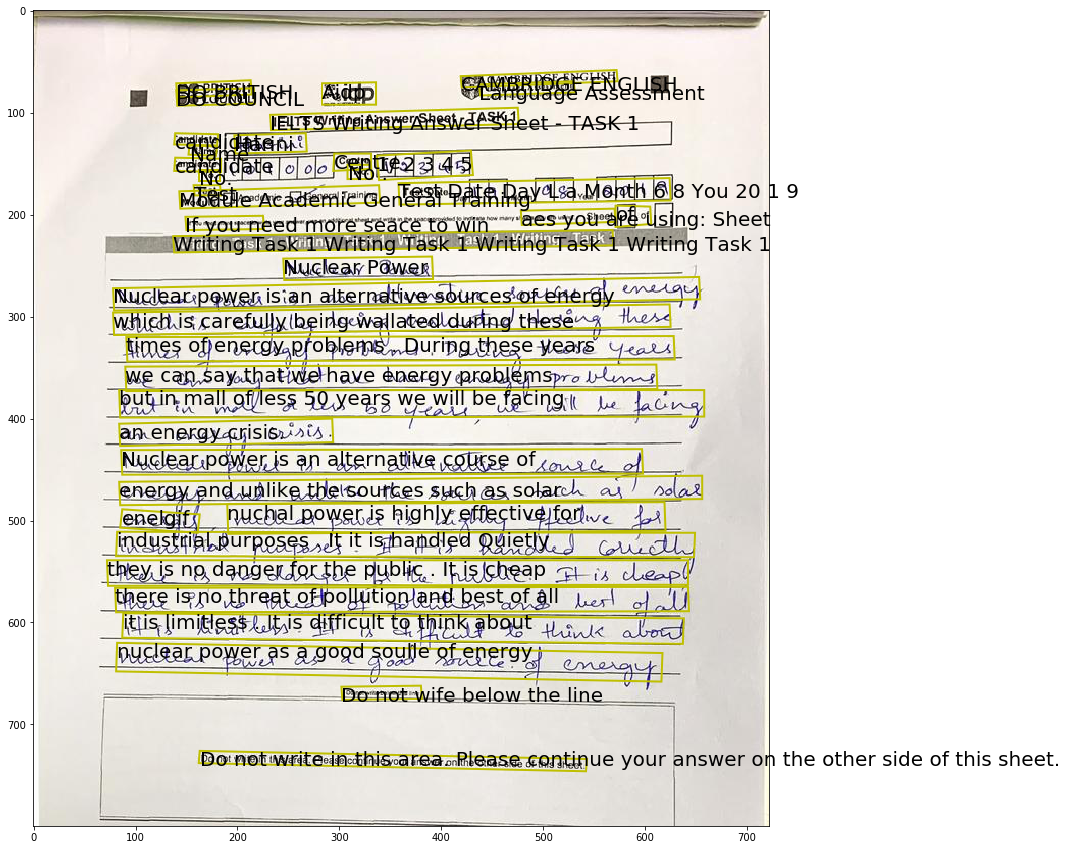

In [0]:
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "48d0473c8e3e4ece92968a854c4f580a"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westcentralus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westus.api.cognitive.microsoft.com/vision/v2.0/"

text_recognition_url = vision_base_url + "read/core/asyncBatchAnalyze"


# Set image_url to the URL of an image that you want to analyze.
image_url = "https://i.postimg.cc/Dz4P0Tgp/Ielts-Writing1.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, json=data)
response.raise_for_status()

# Extracting text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    print(analysis)
    time.sleep(1)
    if ("recognitionResults" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll = False

polygons = []
if ("recognitionResults" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["recognitionResults"][0]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")


